In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load and prepare data (reuse from previous code)
customers = pd.read_csv("Customers.csv")
products=pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")
df = transactions.merge(customers, on='CustomerID').merge(products,on="ProductID")


In [3]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [4]:
df['Price_x']==df['Price_y']

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

In [5]:
df=df.drop(columns="Price_x").rename(columns={"Price_y":"Price"})

In [6]:
# Aggregate features
customer_features=df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean',
    'Category': lambda x: len(set(x)),
}).reset_index()


In [7]:
customer_features

,CustomerID,TransactionID,Quantity,TotalValue,Price,Category
0,C0001,5,12,3354.52,278.334000,3
1,C0002,4,10,1862.74,208.920000,2
2,C0003,4,14,2725.38,195.707500,3
3,C0004,8,23,5354.88,240.636250,3
4,C0005,3,7,2034.24,291.603333,2
...,...,...,...,...,...,...
194,C0196,4,12,4982.88,416.992500,3
195,C0197,3,9,1928.65,227.056667,2
196,C0198,2,3,931.83,239.705000,2
197,C0199,4,9,1979.28,250.610000,2


In [8]:
customer_features.columns = ['CustomerID', 'TotalTransactions', 'TotalQuantity', 
                             'TotalValue', 'AvgTransactionValue', 'UniqueCategories']


In [9]:
customer_features

,CustomerID,TotalTransactions,TotalQuantity,TotalValue,AvgTransactionValue,UniqueCategories
0,C0001,5,12,3354.52,278.334000,3
1,C0002,4,10,1862.74,208.920000,2
2,C0003,4,14,2725.38,195.707500,3
3,C0004,8,23,5354.88,240.636250,3
4,C0005,3,7,2034.24,291.603333,2
...,...,...,...,...,...,...
194,C0196,4,12,4982.88,416.992500,3
195,C0197,3,9,1928.65,227.056667,2
196,C0198,2,3,931.83,239.705000,2
197,C0199,4,9,1979.28,250.610000,2


In [10]:
customers['RegionEncoded'] = customers['Region'].astype('category').cat.codes
customer_features = customer_features.merge(customers[['CustomerID', 'RegionEncoded']], on='CustomerID')

In [11]:
customer_features

,CustomerID,TotalTransactions,TotalQuantity,TotalValue,AvgTransactionValue,UniqueCategories,RegionEncoded
0,C0001,5,12,3354.52,278.334000,3,3
1,C0002,4,10,1862.74,208.920000,2,0
2,C0003,4,14,2725.38,195.707500,3,3
3,C0004,8,23,5354.88,240.636250,3,3
4,C0005,3,7,2034.24,291.603333,2,0
...,...,...,...,...,...,...,...
194,C0196,4,12,4982.88,416.992500,3,1
195,C0197,3,9,1928.65,227.056667,2,1
196,C0198,2,3,931.83,239.705000,2,1
197,C0199,4,9,1979.28,250.610000,2,1


In [12]:
sc=StandardScaler()
scaled=sc.fit_transform(customer_features.drop(columns="CustomerID"))

In [13]:
scaled

array([[-0.01145819, -0.12203296, -0.06170143,  0.09467022,  0.16054032,
         1.23740234],
       [-0.46749414, -0.44800021, -0.87774353, -0.90401592, -0.90437716,
        -1.41989693],
       [-0.46749414,  0.20393428, -0.40585722, -1.09410928,  0.16054032,
         1.23740234],
       ...,
       [-1.37956603, -1.58888557, -1.38697529, -0.46110018, -0.90437716,
        -0.53413051],
       [-0.46749414, -0.61098383, -0.81399315, -0.30420572, -0.90437716,
        -0.53413051],
       [-0.01145819,  0.52990153,  0.70636652,  0.35611784,  1.22545781,
        -1.41989693]])

In [14]:
wcss = []
cluster_range = range(2, 11)  # Testing between 2 and 10 clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_) 

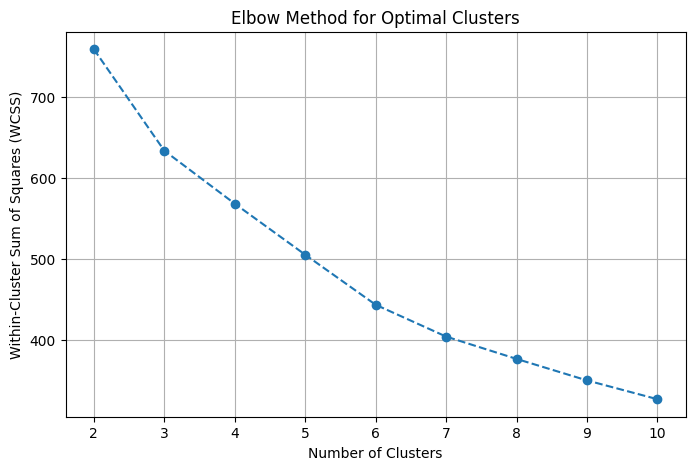

In [15]:
# Plot the Elbow Chart
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled)


In [17]:
customer_features

,CustomerID,TotalTransactions,TotalQuantity,TotalValue,AvgTransactionValue,UniqueCategories,RegionEncoded,Cluster
0,C0001,5,12,3354.52,278.334000,3,3,1
1,C0002,4,10,1862.74,208.920000,2,0,2
2,C0003,4,14,2725.38,195.707500,3,3,1
3,C0004,8,23,5354.88,240.636250,3,3,0
4,C0005,3,7,2034.24,291.603333,2,0,2
...,...,...,...,...,...,...,...,...
194,C0196,4,12,4982.88,416.992500,3,1,1
195,C0197,3,9,1928.65,227.056667,2,1,2
196,C0198,2,3,931.83,239.705000,2,1,2
197,C0199,4,9,1979.28,250.610000,2,1,2


In [18]:
from sklearn.metrics.cluster import davies_bouldin_score

In [19]:
db_index = davies_bouldin_score(scaled, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.4339619357540592


In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

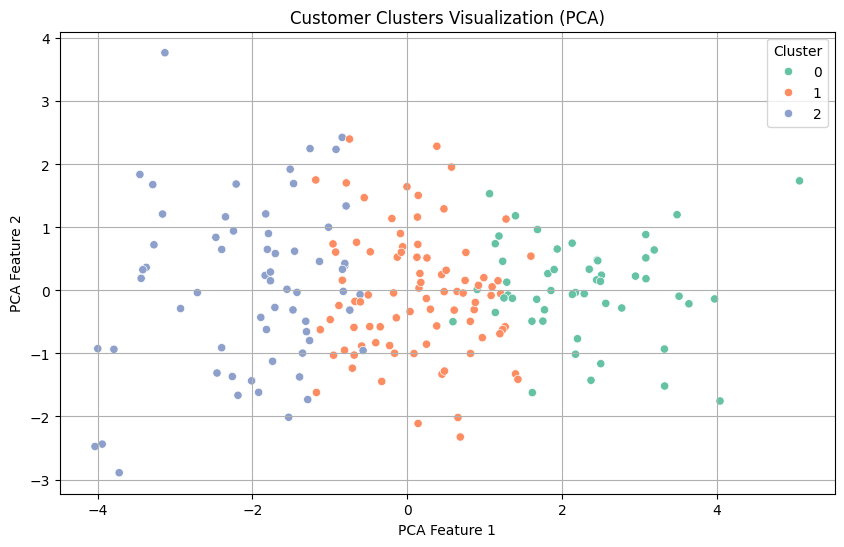

In [21]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_features['Cluster'], palette='Set2')
plt.title("Customer Clusters Visualization (PCA)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend(title='Cluster')
plt.grid()
plt.show()


# Analyze cluster characteristics


In [22]:
# Save clustering results
customer_features.to_csv("Tushar_Clustering.csv", index=False)


In [23]:
cluster_summary = customer_features.groupby('Cluster').agg({
    'TotalTransactions': 'mean',
    'TotalQuantity': 'mean',
    'TotalValue': 'mean',
    'AvgTransactionValue': 'mean',
    'UniqueCategories': 'mean',
    'RegionEncoded': 'mean'
}).reset_index()


In [24]:

print("Cluster Summary:")
print(cluster_summary)

# Save cluster summary
cluster_summary.to_csv("Tushar_Cluster_Summary.csv", index=False)


Cluster Summary:
   Cluster  TotalTransactions  TotalQuantity   TotalValue  \
0        0           7.549020      20.549020  5719.850196   
1        1           5.142857      12.452381  3439.460595   
2        2           2.859375       6.921875  1708.882969   

   AvgTransactionValue  UniqueCategories  RegionEncoded  
0           278.539669          3.666667       1.274510  
1           282.455424          3.059524       2.190476  
2           252.300789          1.921875       1.093750  
